<a href="https://colab.research.google.com/github/Jawad77816/CodeAlpha_Python_Programming/blob/main/Stock%20Portfolio%20Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Added 3 shares of GOOGLE at $2500 per share to the portfolio.
Added 2 shares of AMZN at $3200 per share to the portfolio.


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


No data found for GOOGLE. It may be delisted, a wrong ticker, or market is closed.
AMZN: 2 shares, Buy Price: $3200, Current Price: $178.11, Total Value: $356.22


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


Current Portfolio Value: $356.22


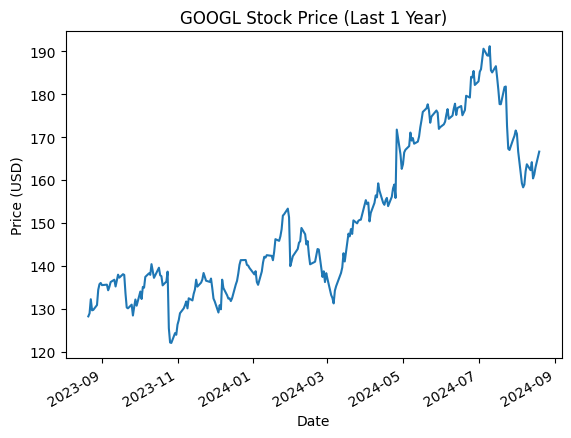

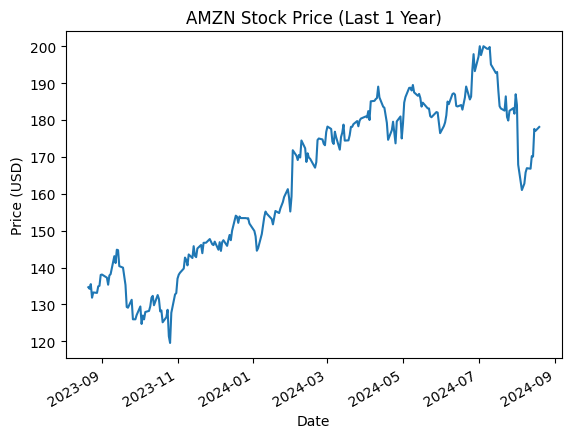

Portfolio saved to portfolio.csv
Portfolio loaded from portfolio.csv


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


No data found for GOOGLE. It may be delisted, a wrong ticker, or market is closed.
AMZN: 2 shares, Buy Price: $3200, Current Price: $178.11, Total Value: $356.22


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


Current Portfolio Value: $356.22
Removed AMZN from the portfolio.


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


No data found for GOOGLE. It may be delisted, a wrong ticker, or market is closed.


ERROR:yfinance:GOOGLE: No data found, symbol may be delisted


Current Portfolio Value: $0.00


In [11]:
# Install necessary libraries
!pip install yfinance pandas matplotlib

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty portfolio dictionary
portfolio = {}

# Function to add a stock to the portfolio
def add_stock(ticker, quantity, buy_price):
    portfolio[ticker] = {"quantity": quantity, "buy_price": buy_price}
    print(f"Added {quantity} shares of {ticker} at ${buy_price} per share to the portfolio.")

# Function to remove a stock from the portfolio
def remove_stock(ticker):
    if ticker in portfolio:
        del portfolio[ticker]
        print(f"Removed {ticker} from the portfolio.")
    else:
        print(f"{ticker} is not in the portfolio.")

# Function to calculate the current value of the portfolio
def get_portfolio_value():
    total_value = 0
    for ticker, data in portfolio.items():
        stock = yf.Ticker(ticker)
        history = stock.history(period="1d")
        if not history.empty:
            current_price = history["Close"].iloc[-1]
            total_value += current_price * data["quantity"]
        else:
            print(f"Warning: No data found for {ticker}. Skipping in portfolio value calculation.")
    return total_value

# Function to display the portfolio
def display_portfolio():
    for ticker, data in portfolio.items():
        stock = yf.Ticker(ticker)
        history = stock.history(period="1d")
        if not history.empty:
            current_price = history["Close"].iloc[-1]
            total_value = current_price * data["quantity"]
            print(f"{ticker}: {data['quantity']} shares, Buy Price: ${data['buy_price']}, "
                  f"Current Price: ${current_price:.2f}, Total Value: ${total_value:.2f}")
        else:
            print(f"No data found for {ticker}. It may be delisted, a wrong ticker, or market is closed.")
    print(f"Current Portfolio Value: ${get_portfolio_value():.2f}")

# Function to plot the historical performance of a stock
def plot_stock(ticker):
    stock = yf.Ticker(ticker)
    history = stock.history(period="1y")
    history["Close"].plot(title=f"{ticker} Stock Price (Last 1 Year)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.show()

# Function to save the portfolio to a CSV file
def save_portfolio(filename="portfolio.csv"):
    df = pd.DataFrame(portfolio).T
    df.to_csv(filename)
    print(f"Portfolio saved to {filename}")

# Function to load the portfolio from a CSV file
def load_portfolio(filename="portfolio.csv"):
    global portfolio
    portfolio = pd.read_csv(filename, index_col=0).T.to_dict()
    print(f"Portfolio loaded from {filename}")

# Example usage
add_stock("GOOGLE", 3, 2500)
add_stock("AMZN", 2, 3200)
display_portfolio()

# Plot a stock's performance
plot_stock("GOOGL")
plot_stock("AMZN")
# Save the portfolio to a file
save_portfolio()

# Load the portfolio from a file
load_portfolio()
display_portfolio()

# Remove a stock from the portfolio
remove_stock("AMZN")
display_portfolio()
